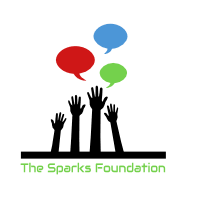
<h3 align="center"> Graduate Rotational Internship Programme </h3>          

<h3 align="center">The Sparks Foundation </h3> 

# TASK_6 (by TUSHAR BANSAL)

## Timeline Analysis : Covid-19

In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


# Importing Covid-19 Dataset

In [23]:
c19 = pd.read_csv("Covid-19_figures.csv")
c19.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [24]:
c19.shape

(187, 15)

In [25]:
# Deleting Useless Columns

c19.drop(["WHO Region","New recovered","Recovered","Confirmed last week","1 week change","1 week % increase","Recovered / 100 Cases"],axis=1, inplace=True)

In [26]:
c19.head()

,Country/Region,Confirmed,Deaths,Active,New cases,New deaths,Deaths / 100 Cases,Deaths / 100 Recovered
0,Afghanistan,36263,1269,9796,106,10,3.50,5.04
1,Albania,4880,144,1991,117,6,2.95,5.25
2,Algeria,27973,1163,7973,616,8,4.16,6.17
3,Andorra,907,52,52,10,0,5.73,6.48
4,Angola,950,41,667,18,1,4.32,16.94


In [27]:
# Aggregating rows by Country
c19_aggregated = c19.groupby("Country/Region").sum()
c19_aggregated.head()

,Confirmed,Deaths,Active,New cases,New deaths,Deaths / 100 Cases,Deaths / 100 Recovered
Country/Region,,,,,,,
Afghanistan,36263,1269,9796,106,10,3.50,5.04
Albania,4880,144,1991,117,6,2.95,5.25
Algeria,27973,1163,7973,616,8,4.16,6.17
Andorra,907,52,52,10,0,5.73,6.48
Angola,950,41,667,18,1,4.32,16.94


In [28]:
c19_aggregated.shape

(187, 7)

# Visualizing the Data

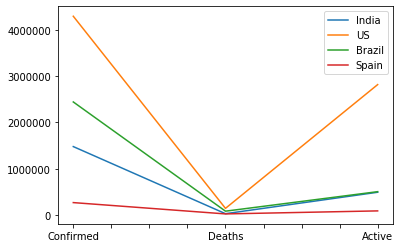

In [29]:
c19_aggregated.loc["India"][:3].plot()
c19_aggregated.loc["US"][:3].plot()
c19_aggregated.loc["Brazil"][:3].plot()
c19_aggregated.loc["Spain"][:3].plot()
plt.legend()

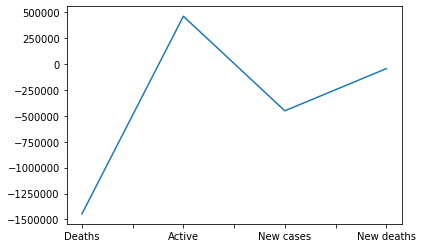

In [30]:
# Calculating 1st Derivative of the curve

c19_aggregated.loc["India"][:5].diff().plot()

In [31]:
c19_aggregated.loc["India"].diff().max()

462091.0

In [32]:
countries = list(c19_aggregated.index)
max_infection_rates= []
for c in countries:
    max_infection_rates.append(c19_aggregated.loc[c].diff().max())
c19_aggregated["max_infection_rate"] = max_infection_rates

In [33]:
c19_aggregated.head()

,Confirmed,Deaths,Active,New cases,New deaths,Deaths / 100 Cases,Deaths / 100 Recovered,max_infection_rate
Country/Region,,,,,,,,
Afghanistan,36263,1269,9796,106,10,3.50,5.04,8527.00
Albania,4880,144,1991,117,6,2.95,5.25,1847.00
Algeria,27973,1163,7973,616,8,4.16,6.17,6810.00
Andorra,907,52,52,10,0,5.73,6.48,5.73
Angola,950,41,667,18,1,4.32,16.94,626.00


In [34]:
corona_data = pd.DataFrame(c19_aggregated["max_infection_rate"])
corona_data

,max_infection_rate
Country/Region,
Afghanistan,8527.00
Albania,1847.00
Algeria,6810.00
Andorra,5.73
Angola,626.00
...,...
West Bank and Gaza,6713.00
Western Sahara,10.00
Yemen,29.42


# Importing Happiness Ranking Dataset

In [35]:
hap_csv = pd.read_csv("world_happiness_report.csv")
hap_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [36]:
hap_csv.drop(["Overall rank","Score","Generosity","Freedom to make life choices","Perceptions of corruption"], axis=1, inplace=True)
hap_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy
0,Finland,1.340,1.587,0.986
1,Denmark,1.383,1.573,0.996
2,Norway,1.488,1.582,1.028
3,Iceland,1.380,1.624,1.026
4,Netherlands,1.396,1.522,0.999


In [37]:
hap_csv = hap_csv.groupby("Country or region").sum()
hap_csv.head()

,GDP per capita,Social support,Healthy life expectancy
Country or region,,,
Afghanistan,0.350,0.517,0.361
Albania,0.947,0.848,0.874
Algeria,1.002,1.160,0.785
Argentina,1.092,1.432,0.881
Armenia,0.850,1.055,0.815


In [38]:
hap_csv.shape

(156, 3)

# Joining the 2 Datasets

In [39]:
data=corona_data.join(hap_csv, how="inner")

In [40]:
data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy
Afghanistan,8527.00,0.350,0.517,0.361
Albania,1847.00,0.947,0.848,0.874
Algeria,6810.00,1.002,1.160,0.785
Argentina,88723.00,1.092,1.432,0.881
Armenia,9303.00,0.850,1.055,0.815
...,...,...,...,...
Venezuela,5737.00,0.960,1.427,0.805
Vietnam,66.00,0.741,1.346,0.851
Yemen,29.42,0.287,1.163,0.463
Zambia,1457.00,0.578,1.058,0.426


# Visualzing the Result 

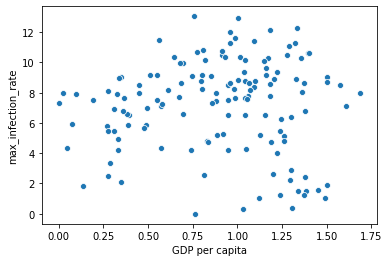

In [41]:
x=data["GDP per capita"]
y=data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

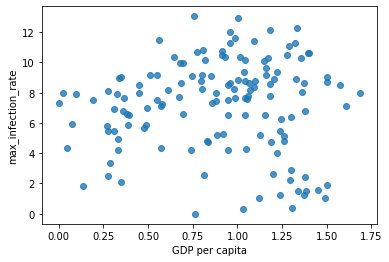

In [42]:
sns.regplot(x, np.log(y))